# IMPORTANT PASE ENV_BOOKING IN CELL BELOW


In [0]:
## PASE ENV_BOOKING SAS TOKEN HERE EXACTLY OR IT WILL NOT WORK

# Loading datasets into a dataframe

last update: 2025-12-24

In [0]:
storage_account = "lab94290"  
container = "airbnb"

# Read Booking.com

In [0]:

fname = "booking_1_9.parquet"
# 2) tell ABFS to use SAS for the account and give the fixed token provider
acct = storage_account  # e.g. "lab94290"
spark.conf.set(f"fs.azure.account.auth.type.{acct}.dfs.core.windows.net", "SAS")
spark.conf.set(f"fs.azure.sas.token.provider.type.{acct}.dfs.core.windows.net",
               "org.apache.hadoop.fs.azurebfs.sas.FixedSASTokenProvider")
spark.conf.set(f"fs.azure.sas.fixed.token.{acct}.dfs.core.windows.net", sas_token)

path = f"abfss://{container}@{acct}.dfs.core.windows.net/{fname}"

In [0]:
# read the df from the parquet, just to show we can
booking = spark.read.parquet('abfss://booking@lab94290.dfs.core.windows.net/booking_1_9.parquet')
display(booking.limit(5))

availability city coordinates country description fine_print hotel_id house_rules images location managed_by manager_language_spoken manager_score metro_railway_access most_popular_facilities number_of_reviews popular_facilities property_highlights property_information property_surroundings review_score reviews_scores title top_reviews url List(List(1 king bed, null, 2, One-Bedroom Apartment)) Vrindāvan List(27.5737379354334, 77.6546632927292) India Featuring a garden, Mero vrindavan Luxury aavas features accommodations in Vrindāvan. This property offers access to a terrace, free private parking, and free Wifi.

This apartment will provide guests with 1 bedroom, a flat-screen TV, and air conditioning. The apartment also includes 1 bathroom.

Bharatpur Train Station is 31 miles from the apartment, while Mathura Train Station is 9 miles from the property. Agra Airport is 41 miles away. This property does not accommodate bachelor(ette) or similar parties. 12919785 List(List(From 12:00 PM to 11:00 PM You need to let the property know what time you'll be arriving in advance., Check-in), List(From 8:00 AM to 11:00 AM, Check-out), List(Cancellation and prepayment policies vary according to accommodation type. Enter your stay dates and check the conditions of your selected option., Cancellation/ prepayment), List(Child policies Children of all ages are welcome. To see correct prices and occupancy info, add the number and ages of children in your group to your search. Crib and extra bed policies Cribs and extra beds aren't available at this property., Children & Beds), List(There's no age requirement for check-in, No age restriction), List(Smoking is not allowed., Smoking), List(Parties/events are not allowed, Parties), List(Free! Pets are allowed. No extra charges., Pets)) List(https://cf.bstatic.com/xdata/images/hotel/max200/603653035.jpg?k=389f38be85031d2743f99b2fa6dfb9057557c739a921c74399ef5a0ef2d13edd&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653144.jpg?k=f363b0b79f3a6cd34c0deea79fe914db2e9ff4de19718324c9984c473167f21c&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653114.jpg?k=d1db0a18879b81d88ced90184f7baf3d69a655690cb52845fcc66c4734ab1135&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653103.jpg?k=b4196fc9b98950240db78d9648f8c8f88cedad19a0421c8c2c09a056bda0b214&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653086.jpg?k=c947befcb2f56d906e33488fe3bf63dc93a7902d037e2a8e36b8f87dc782261b&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653112.jpg?k=5e4ac49a4cd1ebfceb59314e1c81e80b115250e34a7f8f2784998ea924831857&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653083.jpg?k=ea5c5f07e22411dbe5a8efe3b38d2186907f87c4d6a7b59e4225902920d7e57b&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653080.jpg?k=1a8ad31134e2089042228673eb427c58b040904707917123325d70b8e70bbeb4&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653068.jpg?k=e398c11b34fa5dc518938f033b9234c55b024a0857fa0ff7954399ed1968975f&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653075.jpg?k=d64617957b2a3a2aa8038da09e33c7502bad000c06fea6f2580d4d4ec61931d6&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653077.jpg?k=6e8a8110d71315753c82807a0983eff2cd53c2073abd818f8cec72e646fb2d87&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653088.jpg?k=b2410bbebbf7e7747d63e1eb371676d2b7c142886e49d764bb2eca8ff22ad1b4&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653093.jpg?k=01e8307caea449129657723dd6674cc021f583ec1df15e1bd56aac26ddbee099&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653098.jpg?k=2941324ca574eccb9e3d0eea87e5d46d8151d66b6753ff4fcefd4cdb53203ff7&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653107.jpg?k=2030818f224ee99b97e139e3f0bc79778dd21f32204ae3618fdb13ae7dbac145&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653119.jpg?k=c46bd7884d30ab675cb06330515457f6d56f47bae3ffbc616e449913cae680f6&o=, https://cf.bstatic.com/xdata/images/hotel/max200/603653

Spark Config

In [0]:
spark.conf.set("spark.sql.shuffle.partitions", 100)  # 10 cities × 10 partitions each
spark.conf.set("spark.sql.autoBroadcastJoinThreshold", 50 * 1024 * 1024)  # 50MB


# Booking

##EDA

### Filter cities to our cities

In [0]:
from pyspark.sql import functions as F

# Check unique cities and their counts
city_counts = booking.groupBy("city").count().orderBy(F.desc("count"))
display(city_counts)

#check the total count
print(f"Total records: {booking.count()}")
print(f"Unique cities: {city_counts.count()}")

# sample city names to understand the variations
city_list = [row['city'] for row in city_counts.collect()]
print("Sample city names:")
for city in city_list[:50]:  # First 50
    print(f"  - {city}")

city,count
null,195864
Rome,16914
London,15636
Dubai,15251
Paris,12942
Milan,9339
Athens,9263
Manila,9225
São Paulo,8379
Rio de Janeiro,7205


Total records: 3239391
Unique cities: 156298
Sample city names:
  - None
  - Rome
  - London
  - Dubai
  - Paris
  - Milan
  - Athens
  - Manila
  - São Paulo
  - Rio de Janeiro
  - Marrakesh
  - Tokyo
  - Naples
  - Nairobi
  - Cairo
  - Kissimmee
  - Budapest
  - Warsaw
  - Buenos Aires
  - Kuala Lumpur
  - Lisbon
  - Florence
  - Madrid
  - Málaga
  - Osaka
  - Gdańsk
  - Cannes
  - Cape Town
  - Florianópolis
  - Myrtle Beach
  - Istanbul
  - Split
  - Tbilisi
  - Ho Chi Minh City
  - Nice
  - Destin
  - Bucharest
  - Panama City Beach
  - Porto
  - Krakow
  - Hanoi
  - Seville
  - Orlando
  - Marbella
  - Batumi
  - Palermo
  - Vienna
  - Melbourne
  - Barcelona
  - Ubud


In [0]:
# Target cities configuration
CITIES_CONFIG = [
    ("Bangkok",   13.7563, 100.5018, 40.0),
    ("Dubai",     25.2048,  55.2708, 50.0),
    ("Tokyo",     35.6762, 139.6503, 40.0),
    ("New York",  40.7128, -74.0060, 80.0),
    ("Rome",      41.9028,  12.4964, 35.0),
    ("Amsterdam", 52.3676,   4.9041, 30.0),
    ("London",    51.5074,  -0.1278, 45.0),
    ("Eilat",     29.5577,  34.9519, 20.0),
    ("Tel Aviv",  32.0853,  34.7818, 25.0),
    ("Haifa",     32.7940,  34.9896, 25.0),
]

# Extract just the canonical names
TARGET_CITIES = [city[0] for city in CITIES_CONFIG]
print("Target cities:", TARGET_CITIES)

Target cities: ['Bangkok', 'Dubai', 'Tokyo', 'New York', 'Rome', 'Amsterdam', 'London', 'Eilat', 'Tel Aviv', 'Haifa']


In [0]:
# Create city name mapping 

CITY_NAME_MAPPING = {
    # New York variations
    "New York": "New York",
    "New York City": "New York",
    "NYC": "New York",
    "NY": "New York",
    "Manhattan": "New York",
    "Brooklyn": "New York",
    "Queens": "New York",
    "Bronx": "New York",
    "Staten Island": "New York",
    
    # London variations
    "London": "London",
    "Greater London": "London",
    "City of London": "London",
    "Westminster": "London",
    
    # Tokyo variations
    "Tokyo": "Tokyo",
    "Tōkyō": "Tokyo",
    "Shinjuku": "Tokyo",
    "Shibuya": "Tokyo",
    "Minato": "Tokyo",
    
    # Dubai variations
    "Dubai": "Dubai",
    "Dubayy": "Dubai",
    
    # Bangkok variations
    "Bangkok": "Bangkok",
    "Krung Thep": "Bangkok",
    "Krung Thep Maha Nakhon": "Bangkok",
    
    # Rome variations
    "Rome": "Rome",
    "Roma": "Rome",
    
    # Amsterdam variations
    "Amsterdam": "Amsterdam",
    
    # Tel Aviv variations
    "Tel Aviv": "Tel Aviv",
    "Tel Aviv-Yafo": "Tel Aviv",
    "Tel Aviv - Yafo": "Tel Aviv",
    "Tel Aviv Yafo": "Tel Aviv",
    "Tel-Aviv": "Tel Aviv",
    "Yafo": "Tel Aviv",
    "Jaffa": "Tel Aviv",
    
    # Haifa variations
    "Haifa": "Haifa",
    "Hefa": "Haifa",
    
    # Eilat variations
    "Eilat": "Eilat",
    "Elat": "Eilat",
}

In [0]:
# find cities that CONTAIN our target names
# helps discover variations we might have missed

from pyspark.sql.functions import lower, col

target_patterns = ["new york", "nyc", "manhattan", "brooklyn", 
                   "london", "tokyo", "dubai", "bangkok", 
                   "rome", "roma", "amsterdam", 
                   "tel aviv", "haifa", "eilat"]

# Create a filter for potential matches
pattern_filter = None
for pattern in target_patterns:
    condition = lower(col("city")).contains(pattern)
    if pattern_filter is None:
        pattern_filter = condition
    else:
        pattern_filter = pattern_filter | condition

# Find matching cities
potential_matches = booking.filter(pattern_filter) \
    .groupBy("city") \
    .count() \
    .orderBy(F.desc("count"))

display(potential_matches)

city,count
Rome,16914
London,15636
Dubai,15251
Tokyo,6861
Bangkok,2953
New York,1773
Amsterdam,993
Tel Aviv,956
Eilat,680
Brooklyn,375


In [0]:
from pyspark.sql.functions import when, col, lit, create_map
from itertools import chain

# Method 1: Using map 
mapping_expr = create_map([lit(x) for x in chain(*CITY_NAME_MAPPING.items())])

booking_with_standard_city = booking.withColumn(
    "city_original", col("city")
).withColumn(
    "city_standard",
    when(
        mapping_expr[col("city")].isNotNull(),
        mapping_expr[col("city")]
    ).otherwise(col("city"))  # Keep original if not in mapping
)

# Check the mapping worked
display(
    booking_with_standard_city
    .filter(col("city_standard").isin(TARGET_CITIES))
    .groupBy("city_original", "city_standard")
    .count()
    .orderBy("city_standard", F.desc("count"))
)

city_original,city_standard,count
Amsterdam,Amsterdam,993
Bangkok,Bangkok,2953
Dubai,Dubai,15251
Eilat,Eilat,680
Haifa,Haifa,262
London,London,15636
Westminster,London,92
New York,New York,1773
Brooklyn,New York,375
Queens,New York,83


In [0]:
# Filter to only our 10 target cities
booking_filtered = booking_with_standard_city.filter(
    col("city_standard").isin(TARGET_CITIES)
)

# Rename for cleanliness
booking_filtered = booking_filtered.withColumn(
    "city", col("city_standard")
).drop("city_standard")

# Check counts per city
city_distribution = booking_filtered.groupBy("city").count().orderBy(F.desc("count"))
display(city_distribution)

print(f"\nTotal hotels after filtering: {booking_filtered.count()}")

city,count
Rome,16932
London,15728
Dubai,15251
Tokyo,6870
Bangkok,2953
New York,2295
Amsterdam,993
Tel Aviv,956
Eilat,680
Haifa,262



Total hotels after filtering: 62920


In [0]:
# coordinates is already a STRUCT<lan: DOUBLE, lon: DOUBLE>
# access fields directly with dot notation

booking_with_coords = booking_filtered.withColumn(
    "lat", col("coordinates.lan")  # Note: schema uses 'lan' not 'lat'
).withColumn(
    "lon", col("coordinates.lon")
)

# Check for null coordinates
null_coords = booking_with_coords.filter(
    col("lat").isNull() | col("lon").isNull()
).count()

print(f"Hotels with missing coordinates: {null_coords}")

# Sample coordinates per city to verify
display(
    booking_with_coords
    .groupBy("city")
    .agg(
        F.count("*").alias("count"),
        F.avg("lat").alias("avg_lat"),
        F.avg("lon").alias("avg_lon"),
        F.min("lat").alias("min_lat"),
        F.max("lat").alias("max_lat"),
        F.min("lon").alias("min_lon"),
        F.max("lon").alias("max_lon")
    )
    .orderBy("city")
)

Hotels with missing coordinates: 0


city,count,avg_lat,avg_lon,min_lat,max_lat,min_lon,max_lon
Amsterdam,993,52.14956419903095,4.462224701546012,-26.721448973524,52.4945641649493,-80.9800491,30.665759450314
Bangkok,2953,13.748671356455084,100.55229561328457,13.631410368011,14.119117802389681,100.334688376603,100.93008
Dubai,15251,25.132706982871472,55.22946110699724,24.805077944218247,25.5020695680529,55.00938537105561,56.055004502888
Eilat,680,29.55177668620336,34.94670939305612,29.505634383292318,29.571473,34.91761118173599,34.970906004309654
Haifa,262,32.81426955695624,34.99596132505022,32.7649858,32.8385779,34.956448398148,35.0763575
London,15728,51.38580201521625,-1.1570931558275817,33.7365091598147,51.8811216,-118.02888169884682,0.2380079
New York,2295,40.46712105590009,-73.4731962743845,-37.829378,48.363322,-116.628525,151.249169355878
Rome,16932,41.839493210651035,12.396897920682507,-29.608136557839853,45.70315545144011,-85.24376213550568,148.80764468132313
Tel Aviv,956,32.072504991864406,34.771335053143716,31.89710539445397,32.14401185692,34.7460306299035,35.21386074346314
Tokyo,6870,35.69590915675945,139.7455398032042,34.3321894,35.807505,134.7311453,139.9504081


In [0]:
from pyspark.sql.functions import radians, sin, cos, sqrt, atan2, least

# Haversine distance UDF
def haversine_distance(lat1, lon1, lat2, lon2):
    """Returns distance in km"""
    R = 6371  # Earth's radius in km
    
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    return R * c

# Create a reference DataFrame for city centers
city_centers = spark.createDataFrame(
    CITIES_CONFIG,
    ["city_ref", "center_lat", "center_lon", "radius_km"]
)

# join and calculate distance from city center
booking_validated = booking_with_coords.join(
    city_centers,
    booking_with_coords.city == city_centers.city_ref,
    "left"
).withColumn(
    "distance_from_center_km",
    haversine_distance(col("lat"), col("lon"), col("center_lat"), col("center_lon"))
)

# check how many are within expected radius
validation_stats = booking_validated.groupBy("city").agg(
    F.count("*").alias("total"),
    F.sum(F.when(col("distance_from_center_km") <= col("radius_km"), 1).otherwise(0)).alias("within_radius"),
    F.avg("distance_from_center_km").alias("avg_distance_km"),
    F.max("distance_from_center_km").alias("max_distance_km"),
    F.first("radius_km").alias("expected_radius_km")
)

display(validation_stats)

city,total,within_radius,avg_distance_km,max_distance_km,expected_radius_km
Amsterdam,993,985,55.94015339440517,9144.326947703732,30.0
Rome,16932,16882,28.578477700186827,15708.620138124115,35.0
London,15728,15555,80.80728914959673,8771.55528879822,45.0
Haifa,262,262,3.288826057568912,8.517041536274272,25.0
Tokyo,6870,6861,10.578544213307087,472.2412542525805,40.0
Tel Aviv,956,955,2.2165350536768917,45.80604309139395,25.0
Bangkok,2953,2950,7.343171819370785,46.73932292881982,40.0
Dubai,15251,15248,11.24157130247623,89.87548656836029,50.0
New York,2295,2255,86.08160719618134,16683.248919745343,80.0
Eilat,680,680,1.2231044099682298,6.67253296231006,20.0


#### Remove outliers (via cordinates)

In [0]:
# Flag outliers (hotels that might be misclassified)
outliers = booking_validated.filter(
    col("distance_from_center_km") > col("radius_km") * 1.5  # 50% buffer
).select("hotel_id", "city", "city_original", "lat", "lon", "distance_from_center_km", "radius_km")

print(f"Potential outliers (too far from city center): {outliers.count()}")
display(outliers.limit(20))

Potential outliers (too far from city center): 277


hotel_id,city,city_original,lat,lon,distance_from_center_km,radius_km
6416265,Amsterdam,Amsterdam,42.92977,-74.20379,5715.47408565451,30.0
1679204,Amsterdam,Amsterdam,42.92840606532939,-74.20052966344605,5715.367709311795,30.0
14208346,Amsterdam,Amsterdam,42.9334176,-74.1749892,5713.41489738735,30.0
12024154,Amsterdam,Amsterdam,40.4887773,-80.9800491,6316.058582565324,30.0
264652,Amsterdam,Amsterdam,42.925367329943036,-74.20260965824127,5715.714363808504,30.0
9461983,Amsterdam,Amsterdam,-26.721448973524,30.665759450314,9144.326947703732,30.0
3297052,Amsterdam,Amsterdam,42.932841,-74.199287,5714.973799036134,30.0
1907787,Amsterdam,Amsterdam,-26.650613522908344,30.51391214132309,9132.706638486661,30.0
12534482,Dubai,Dubai,24.819745091978,56.055004502888,89.87548656836029,50.0
13397320,London,London,43.0237643,-81.3212246,5878.327068737782,45.0


In [0]:
# Final cleaning with buffer
BUFFER_MULTIPLIER = 1.5

booking_clean = booking_validated.filter(
    (col("distance_from_center_km") <= col("radius_km") * BUFFER_MULTIPLIER) &
    col("lat").isNotNull() & 
    col("lon").isNotNull()
).select(
    "hotel_id",
    "city",
    "city_original",
    "country",
    "lat",
    "lon",
    "title",
    "description",
    "url",
    "review_score",
    "number_of_reviews",
    "reviews_scores",
    "top_reviews",
    "property_highlights",
    "property_information",
    "most_popular_facilities",
    "popular_facilities",
    "house_rules",
    "fine_print",
    "metro_railway_access",
    "managed_by",
    "manager_score",
    "manager_language_spoken",
    "availability",
    "images",
    "location",
    "property_surroundings",
    "coordinates",
    "distance_from_center_km"  # Keep for reference
)

# Final count per city
display(booking_clean.groupBy("city").count().orderBy("city"))
print(f"\nTotal hotels: {booking_clean.count()}")

city,count
Amsterdam,985
Bangkok,2953
Dubai,15250
Eilat,680
Haifa,262
London,15556
New York,2255
Rome,16883
Tel Aviv,955
Tokyo,6864



Total hotels: 62643


#### Save the clean booking dataset

In [0]:
# Save to DBFS instead of Azure blob
DBFS_SILVER_PATH = "/FileStore/project/silver"

booking_clean.write \
    .mode("overwrite") \
    .partitionBy("city") \
    .parquet(f"{DBFS_SILVER_PATH}/booking_clean")

print(f"Saved to: {DBFS_SILVER_PATH}/booking_clean")

Saved to: /FileStore/project/silver/booking_clean


###Read partitioned data by city (cleaned)

In [0]:
# Load the saved data
booking_clean = spark.read.parquet("/FileStore/project/silver/booking_clean")

# Check schema of all columns
booking_clean.printSchema()

root
 |-- hotel_id: string (nullable = true)
 |-- city_original: string (nullable = true)
 |-- country: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- url: string (nullable = true)
 |-- review_score: double (nullable = true)
 |-- number_of_reviews: long (nullable = true)
 |-- reviews_scores: struct (nullable = true)
 |    |-- category: string (nullable = true)
 |    |-- score: string (nullable = true)
 |-- top_reviews: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- location: string (nullable = true)
 |    |    |-- review: string (nullable = true)
 |    |    |-- reviewer_name: string (nullable = true)
 |-- property_highlights: string (nullable = true)
 |-- property_information: string (nullable = true)
 |-- most_popular_facilities: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- popular_f

In [0]:
# Load from DBFS
booking_clean = spark.read.parquet("dbfs:/FileStore/project/silver/booking_clean")

# Verify it loaded correctly
print(f"Total records: {booking_clean.count()}")
display(booking_clean.groupBy("city").count().orderBy("city"))

Total records: 62643


city,count
Amsterdam,985
Bangkok,2953
Dubai,15250
Eilat,680
Haifa,262
London,15556
New York,2255
Rome,16883
Tel Aviv,955
Tokyo,6864


In [0]:
booking_clean.printSchema()
complex_cols = [
    "top_reviews", 
    "reviews_scores", 
    "availability", 
    "house_rules",
    "popular_facilities", 
    "most_popular_facilities", 
    "property_surroundings",
    "property_highlights",
    "property_information",
    "images"
]

print("Complex Column Types:")
print("-" * 60)
for col_name in complex_cols:
    dtype = dict(booking_clean.dtypes).get(col_name, "NOT FOUND")
    print(f"{col_name}:\n  {dtype}\n")

root
 |-- hotel_id: string (nullable = true)
 |-- city_original: string (nullable = true)
 |-- country: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- url: string (nullable = true)
 |-- review_score: double (nullable = true)
 |-- number_of_reviews: long (nullable = true)
 |-- reviews_scores: struct (nullable = true)
 |    |-- category: string (nullable = true)
 |    |-- score: string (nullable = true)
 |-- top_reviews: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- location: string (nullable = true)
 |    |    |-- review: string (nullable = true)
 |    |    |-- reviewer_name: string (nullable = true)
 |-- property_highlights: string (nullable = true)
 |-- property_information: string (nullable = true)
 |-- most_popular_facilities: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- popular_f

In [0]:
# Sample actual values to see structure
display(
    booking_clean
    .filter(col("number_of_reviews") > 5)
    .select(
        "hotel_id",
        "city", 
        "title",
        "review_score",
        "top_reviews",
        "reviews_scores",
        "popular_facilities",
        "house_rules"
    )
    .limit(3)
)

hotel_id,city,title,review_score,top_reviews,reviews_scores,popular_facilities,house_rules
10836680,Rome,Domus Iulia - Colosseo,9.4,"List(List(ph, Pierre Carlo was very helpful. He went out of his way to meet me at the apartment earlier than the check in time because I arrived early. He gave advice where to eat and where the nearest supermarket wad., Sergio), List(ca, It was 2 blocks from the colosseum, easy to find, great location, very clean, safe and easy to access the property It met all my needs, didn’t have anything I didn’t like, Monique), List(de, The host was so kind and friendly. He helped us to find good places for food. My sister and I enjoyed our stay there. Everything was so new and clean. The kitchen was well equiped and we could drink tea and use washing machine for cleaning clothes. During our stay the weather was so warm and the airconditioner helped us so much! The place was close to coloseum and we could walk to other historical places too., Samira), List(il, The price, the location and the really clean room we got when we checked in. The host is a really sweet guy that constantly offers help and even gave us a list of really nice restaurants in the area. The room comes with a giant Google TV perfect for a good little relaxation movie at the end of a long walking day in Rome. 10/10, Roei), List(ph, The room looks awesome and the size is the best for a single person. The owner is also very helpful in all aspects!, Hannah), List(ge, The apartment was very comfortable for one person. I think the price was a bit higher. 80€ per night,, Roman), List(us, The host is very welcoming. Also he was very responsive to any issues we had with the room. The best part of the rental was the location it's only a 5 min walk from the Colosseum. The room was super clean which is also very important to me. The room comes with all the amenities you will need during your stay too such as the washing machine for laundry including the detergent for it as well. The room also comes with coffee, and the host was so nice to show me how to use the Italian coffee maker. We did have a few issues during our stay, the WiFi went out which made it difficult to communicate with loved ones overseas. The lack of WiFi also didn't allow for entertainment during our downtime and evenings in the room. The towel warmer also wasn't functioning properly which normally wouldn't be a big deal but we were trying to use it to dry our clothing after the wash. The room we were in didn't get much sunlight making it hard for our clothes to dry. We didn't feel comfortable leaving our clothes hanging in the common area either., Schubert), List(ca, Very clean and comfortable and it was nice to have a kitchen. I would stay again. The shutters were shut in the room as it was at ground level outside and so the room felt quite dark during the day. There was no-one at the property when I got there despite telling them the time I would arrive. They didn’t answer their phone either but did turn up about 15 mins later. I didn’t see any other hotel staff all week either but they did respond to messages quite quickly., Nikki), List(ca, Good location, clean modern apartment with a roman touch. Host is friendly and answered all our questions, good communication before and during our stay. N/A, Hind), List(tw, Although the single room is not large, it is perfectly designed. Functionality and user experience are perfectly integrated. If the sound insulation can be improved, such as the sound insulation effect of corridors and room doors, it can make the stay more private. Sounds from next door rooms and corridors, Sylvia))","List(null, null)","List(null, null)","List(List(From 2:00 PM to 8:00 PM Guests are required to show a photo ID and credit card at check-in. You need to let the property know what time you'll be arriving in advance., Check-in), List(Until 10:00 AM, Check-out), List(Cancellation and prepayment policies vary according to accommodation type. Enter your stay dat

## clean and format fields for later usage

### Load dataset and sample reveiws

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col, explode, concat_ws, collect_list, size, lower, when, lit, regexp_extract, array_contains, expr

# Load data
booking_clean = spark.read.parquet("dbfs:/FileStore/project/silver/booking_clean")

# Extract review text and metadata from top_reviews array
booking_with_reviews = booking_clean.withColumn(
    # Concatenate all review texts into one string
    "all_reviews_text",
    expr("concat_ws(' ||| ', transform(top_reviews, x -> x.review))")
).withColumn(
    # Count of reviews available
    "num_reviews_available",
    size(col("top_reviews"))
).withColumn(
    # List of reviewer countries (for diversity analysis)
    "reviewer_countries",
    expr("transform(top_reviews, x -> x.location)")
).withColumn(
    # Number of unique countries
    "num_reviewer_countries",
    size(expr("array_distinct(transform(top_reviews, x -> x.location))"))
)

# Check the results
display(
    booking_with_reviews
    .select("hotel_id", "title", "num_reviews_available", "num_reviewer_countries", "all_reviews_text")
    .filter(col("num_reviews_available") > 0)
    .limit(5)
)

hotel_id,title,num_reviews_available,num_reviewer_countries,all_reviews_text
10836680,Domus Iulia - Colosseo,10,7,"Pierre Carlo was very helpful. He went out of his way to meet me at the apartment earlier than the check in time because I arrived early. He gave advice where to eat and where the nearest supermarket wad. ||| It was 2 blocks from the colosseum, easy to find, great location, very clean, safe and easy to access the property It met all my needs, didn’t have anything I didn’t like ||| The host was so kind and friendly. He helped us to find good places for food. My sister and I enjoyed our stay there. Everything was so new and clean. The kitchen was well equiped and we could drink tea and use washing machine for cleaning clothes. During our stay the weather was so warm and the airconditioner helped us so much! The place was close to coloseum and we could walk to other historical places too. ||| The price, the location and the really clean room we got when we checked in. The host is a really sweet guy that constantly offers help and even gave us a list of really nice restaurants in the area. The room comes with a giant Google TV perfect for a good little relaxation movie at the end of a long walking day in Rome. 10/10 ||| The room looks awesome and the size is the best for a single person. The owner is also very helpful in all aspects! ||| The apartment was very comfortable for one person. I think the price was a bit higher. 80€ per night, ||| The host is very welcoming. Also he was very responsive to any issues we had with the room. The best part of the rental was the location it's only a 5 min walk from the Colosseum. The room was super clean which is also very important to me. The room comes with all the amenities you will need during your stay too such as the washing machine for laundry including the detergent for it as well. The room also comes with coffee, and the host was so nice to show me how to use the Italian coffee maker. We did have a few issues during our stay, the WiFi went out which made it difficult to communicate with loved ones overseas. The lack of WiFi also didn't allow for entertainment during our downtime and evenings in the room. The towel warmer also wasn't functioning properly which normally wouldn't be a big deal but we were trying to use it to dry our clothing after the wash. The room we were in didn't get much sunlight making it hard for our clothes to dry. We didn't feel comfortable leaving our clothes hanging in the common area either. ||| Very clean and comfortable and it was nice to have a kitchen. I would stay again. The shutters were shut in the room as it was at ground level outside and so the room felt quite dark during the day. There was no-one at the property when I got there despite telling them the time I would arrive. They didn’t answer their phone either but did turn up about 15 mins later. I didn’t see any other hotel staff all week either but they did respond to messages quite quickly. ||| Good location, clean modern apartment with a roman touch. Host is friendly and answered all our questions, good communication before and during our stay. N/A ||| Although the single room is not large, it is perfectly designed. Functionality and user experience are perfectly integrated. If the sound insulation can be improved, such as the sound insulation effect of corridors and room doors, it can make the stay more private. Sounds from next door rooms and corridors"
1246084,Domus Navona Pantheon,10,9,"The location, we were able to walk Rome up and down and come back to the property walking without any issues. The shower is tiny. ||| The host was very responsive and met us at the apartment. She showed us the apartment and went over on a map all the places to go and how to get there. Very friendly. The location was perfect! We walked everywhere from there. ||| Location was great, spacious open room. Little kitchen area was good and having a washing machine was helpful. 4 keys to get into the 

### Amenity Flags and EDA

In [0]:
# Define amenities to look for (based on common Booking.com facilities)
AMENITY_KEYWORDS = {
    "has_wifi": ["wifi", "wi-fi", "wireless", "internet"],
    "has_parking": ["parking", "garage"],
    "has_ac": ["air conditioning", "air-conditioning", "ac", "a/c"],
    "has_pool": ["pool", "swimming"],
    "has_gym": ["gym", "fitness", "workout"],
    "has_kitchen": ["kitchen", "kitchenette"],
    "has_breakfast": ["breakfast"],
    "has_restaurant": ["restaurant"],
    "has_spa": ["spa", "wellness", "sauna"],
    "has_elevator": ["elevator", "lift"],
    "has_balcony": ["balcony", "terrace"],
    "has_heating": ["heating"],
    "has_laundry": ["laundry", "washing machine"],
    "has_airport_shuttle": ["airport shuttle", "airport transfer"],
    "has_family_rooms": ["family room"],
    "has_non_smoking": ["non-smoking", "non smoking"],
    "has_pet_friendly": ["pet friendly", "pets allowed"],
    "has_room_service": ["room service"],
}

# Create a UDF to check if any keyword exists in the facilities array
def create_amenity_columns(df):
    """Add boolean columns for each amenity based on most_popular_facilities"""
    
    for amenity_col, keywords in AMENITY_KEYWORDS.items():
        # Create condition: check if any keyword is in any facility string
        conditions = None
        for keyword in keywords:
            condition = expr(f"exists(most_popular_facilities, x -> lower(x) like '%{keyword}%')")
            if conditions is None:
                conditions = condition
            else:
                conditions = conditions | condition
        
        # Handle null arrays
        df = df.withColumn(
            amenity_col,
            when(col("most_popular_facilities").isNull(), False)
            .otherwise(conditions)
        )
    
    return df

# Apply amenity extraction
booking_with_amenities = create_amenity_columns(booking_with_reviews)

# Add amenities count
booking_with_amenities = booking_with_amenities.withColumn(
    "amenities_count",
    when(col("most_popular_facilities").isNull(), 0)
    .otherwise(size(col("most_popular_facilities")))
)

# Check results
amenity_cols = list(AMENITY_KEYWORDS.keys()) + ["amenities_count"]
display(
    booking_with_amenities
    .select(["hotel_id", "title", "most_popular_facilities"] + amenity_cols)
    .limit(10)
)

hotel_id,title,most_popular_facilities,has_wifi,has_parking,has_ac,has_pool,has_gym,has_kitchen,has_breakfast,has_restaurant,has_spa,has_elevator,has_balcony,has_heating,has_laundry,has_airport_shuttle,has_family_rooms,has_non_smoking,has_pet_friendly,has_room_service,amenities_count
10836680,Domus Iulia - Colosseo,"List(Free Wifi, Elevator, Heating, Air conditioning, Free Wifi, Elevator, Heating, Air conditioning)",true,false,true,false,false,false,false,false,false,true,false,true,false,false,false,false,false,false,8
1246084,Domus Navona Pantheon,"List(Free Wifi, Non-smoking rooms, Elevator, Heating, Air conditioning, Free Wifi, Non-smoking rooms, Elevator, Heating, Air conditioning)",true,false,true,false,false,false,false,false,false,true,false,true,false,false,false,true,false,false,10
81972,Sunny Guest House,"List(Good free Wifi (29 Mbps), Non-smoking rooms, Terrace, Elevator, Heating, Daily housekeeping, Air conditioning, Baggage storage, Tea/Coffee Maker in All Rooms, Good free Wifi (29 Mbps), Non-smoking rooms, Terrace, Elevator, Heating, Daily housekeeping, Air conditioning, Baggage storage, Tea/Coffee Maker in All Rooms)",true,false,true,false,false,false,false,false,false,true,true,true,false,false,false,true,false,false,18
2789192,Trevi Luxury Terrace,"List(Free Wifi, Airport shuttle, Family rooms, Non-smoking rooms, Terrace, Elevator, Heating, Daily housekeeping, Air conditioning)",true,false,true,false,false,false,false,false,false,true,true,true,false,true,true,true,false,false,9
80245,Exe Domus Aurea,"List(Free Wifi, Non-smoking rooms, 24-hour front desk, Facilities for disabled guests, Terrace, Elevator, Heating, Laundry, Tea/Coffee Maker in All Rooms, Very Good Breakfast)",true,false,true,false,false,false,true,false,false,true,true,true,true,false,false,true,false,false,10
2196276,Casa dell'Arco - WelcomeToRhome,"List(Free Wifi, Airport shuttle, Non-smoking rooms, Heating, Air conditioning, Free Wifi, Airport shuttle, Non-smoking rooms, Heating, Air conditioning)",true,false,true,false,false,false,false,false,false,false,false,true,false,true,false,true,false,false,10
9480889,Days In Rome,"List(Free Wifi, Family rooms, Non-smoking rooms, Elevator, Heating, Air conditioning, Tea/Coffee Maker in All Rooms, Free Wifi, Family rooms, Non-smoking rooms, Elevator, Heating, Air conditioning, Tea/Coffee Maker in All Rooms)",true,false,true,false,false,false,false,false,false,true,false,true,false,false,true,true,false,false,14
9293517,Alloggio Hello Roma 2.0,"List(Free Wifi, Heating, Air conditioning, Free Wifi, Heating, Air conditioning)",true,false,true,false,false,false,false,false,false,false,false,true,false,false,false,false,false,false,6
1181419,Prati House,"List(Free Wifi, Family rooms, Non-smoking rooms, Elevator, Heating, Air conditioning, Free Wifi, Family rooms, Non-smoking rooms, Elevator, Heating, Air conditioning)",true,false,true,false,false,false,false,false,false,true,false,true,false,false,true,true,false,false,12
9494936,Domus Magnifica,"List(Fast free Wifi 219 Mbps), Family rooms, Non-smoking rooms, 24-hour front desk, Elevator, Heating, Baggage storage, Fast free Wifi 219 Mbps), Family rooms, Non-smoking rooms, 24-hour front desk, Elevator, Heating, Baggage storage)",true,false,false,false,false,false,false,false,false,true,false,true,false,false,true,true,false,false,14


In [0]:
# Summary statistics for amenities
print("Amenity Distribution Across All Hotels:")
print("-" * 50)

for amenity_col in AMENITY_KEYWORDS.keys():
    count = booking_with_amenities.filter(col(amenity_col) == True).count()
    pct = count / booking_with_amenities.count() * 100
    print(f"{amenity_col}: {count:,} ({pct:.1f}%)")

Amenity Distribution Across All Hotels:
--------------------------------------------------
has_wifi: 58,984 (94.2%)
has_parking: 28,523 (45.5%)
has_ac: 47,509 (75.8%)
has_pool: 15,034 (24.0%)
has_gym: 10,261 (16.4%)
has_kitchen: 0 (0.0%)
has_breakfast: 6,097 (9.7%)
has_restaurant: 3,321 (5.3%)
has_spa: 1,434 (2.3%)
has_elevator: 25,062 (40.0%)
has_balcony: 13,402 (21.4%)
has_heating: 25,224 (40.3%)
has_laundry: 5,100 (8.1%)
has_airport_shuttle: 7,688 (12.3%)
has_family_rooms: 21,901 (35.0%)
has_non_smoking: 36,733 (58.6%)
has_pet_friendly: 0 (0.0%)
has_room_service: 2,629 (4.2%)


### House rules

In [0]:
# Extract specific rules from house_rules array
booking_with_rules = booking_with_amenities.withColumn(
    # Check-in rule description
    "checkin_rule",
    expr("filter(house_rules, x -> x.rule = 'Check-in')[0].description")
).withColumn(
    # Check-out rule description  
    "checkout_rule",
    expr("filter(house_rules, x -> x.rule = 'Check-out')[0].description")
).withColumn(
    # Pets allowed
    "pets_allowed",
    expr("""
        size(filter(house_rules, x -> 
            x.rule = 'Pets' AND 
            (lower(x.description) like '%allowed%' OR lower(x.description) like '%welcome%')
            AND lower(x.description) NOT like '%not allowed%'
        )) > 0
    """)
).withColumn(
    # Smoking allowed
    "smoking_allowed",
    expr("""
        size(filter(house_rules, x -> 
            x.rule = 'Smoking' AND 
            lower(x.description) NOT like '%not allowed%'
            AND lower(x.description) NOT like '%no smoking%'
        )) > 0
    """)
).withColumn(
    # Parties allowed
    "parties_allowed",
    expr("""
        size(filter(house_rules, x -> 
            x.rule = 'Parties' AND 
            lower(x.description) NOT like '%not allowed%'
        )) > 0
    """)
).withColumn(
    # Has quiet hours
    "has_quiet_hours",
    expr("size(filter(house_rules, x -> x.rule = 'Quiet hours')) > 0")
)

# Extract check-in/out times using regex
booking_with_rules = booking_with_rules.withColumn(
    "checkin_start_hour",
    regexp_extract(col("checkin_rule"), r"From (\d{1,2}):\d{2}", 1).cast("int")
).withColumn(
    "checkout_hour",
    regexp_extract(col("checkout_rule"), r"(\d{1,2}):\d{2}", 1).cast("int")
)

# Check results
display(
    booking_with_rules
    .select(
        "hotel_id", "title", 
        "checkin_rule", "checkin_start_hour",
        "checkout_rule", "checkout_hour",
        "pets_allowed", "smoking_allowed", "parties_allowed", "has_quiet_hours"
    )
    .limit(10)
)

hotel_id,title,checkin_rule,checkin_start_hour,checkout_rule,checkout_hour,pets_allowed,smoking_allowed,parties_allowed,has_quiet_hours
10836680,Domus Iulia - Colosseo,From 2:00 PM to 8:00 PM Guests are required to show a photo ID and credit card at check-in. You need to let the property know what time you'll be arriving in advance.,2,Until 10:00 AM,10,false,false,false,true
1246084,Domus Navona Pantheon,From 3:00 PM You need to let the property know what time you'll be arriving in advance.,3,Until 10:00 AM,10,false,false,false,false
81972,Sunny Guest House,From 1:00 PM to 11:30 PM You need to let the property know what time you'll be arriving in advance.,1,From 1:00 AM to 10:30 AM,1,false,false,false,false
2789192,Trevi Luxury Terrace,From 11:00 AM to 9:00 PM You need to let the property know what time you'll be arriving in advance.,11,Until 10:00 AM,10,false,false,false,true
80245,Exe Domus Aurea,From 2:00 PM Guests are required to show a photo ID and credit card at check-in.,2,Until 12:00 PM,12,false,false,false,false
2196276,Casa dell'Arco - WelcomeToRhome,From 3:00 PM to 9:00 PM Guests are required to show a photo ID and credit card at check-in. You need to let the property know what time you'll be arriving in advance.,3,Until 10:00 AM,10,false,false,false,true
9480889,Days In Rome,From 3:00 PM to 12:00 AM,3,From 7:00 AM to 10:00 AM,7,false,false,false,true
9293517,Alloggio Hello Roma 2.0,From 12:00 PM to 9:00 PM,12,From 8:00 AM to 10:00 AM,8,false,false,false,false
1181419,Prati House,From 2:00 PM to 11:00 PM You need to let the property know what time you'll be arriving in advance.,2,From 10:00 AM to 10:30 AM,10,false,false,false,false
9494936,Domus Magnifica,From 2:00 PM to 10:00 PM Guests are required to show a photo ID and credit card at check-in. You need to let the property know what time you'll be arriving in advance.,2,From 7:00 AM to 10:00 AM,7,false,false,false,true


### Property Surroundings

In [0]:
# Extract features from property_surroundings
booking_with_surroundings = booking_with_rules.withColumn(
    # Number of nearby POIs listed
    "num_nearby_pois",
    when(col("property_surroundings").isNull(), 0)
    .otherwise(size(col("property_surroundings")))
).withColumn(
    # Nearest POI distance (in km, assuming all are in km)
    "nearest_poi_distance_km",
    expr("array_min(transform(property_surroundings, x -> x.distance))")
).withColumn(
    # Average POI distance
    "avg_poi_distance_km",
    expr("aggregate(transform(property_surroundings, x -> x.distance), 0D, (acc, x) -> acc + x) / size(property_surroundings)")
)

# Check results
display(
    booking_with_surroundings
    .select("hotel_id", "title", "num_nearby_pois", "nearest_poi_distance_km", "avg_poi_distance_km")
    .filter(col("num_nearby_pois") > 0)
    .limit(10)
)

hotel_id,title,num_nearby_pois,nearest_poi_distance_km,avg_poi_distance_km
10836680,Domus Iulia - Colosseo,10,0.34,0.7057
1246084,Domus Navona Pantheon,10,0.191,0.3002
81972,Sunny Guest House,10,0.527,0.7854999999999999
2789192,Trevi Luxury Terrace,10,0.139,0.35039999999999993
80245,Exe Domus Aurea,10,0.159,0.309
2196276,Casa dell'Arco - WelcomeToRhome,10,0.0,0.2712
9480889,Days In Rome,10,1.603,2.2616000000000005
9293517,Alloggio Hello Roma 2.0,10,0.303,0.667
1181419,Prati House,10,0.461,0.8485000000000001
9494936,Domus Magnifica,10,0.546,1.7683


### Expectetions claims

In [0]:
# Keywords that create expectations
CLAIM_KEYWORDS = {
    "claims_quiet": ["quiet", "peaceful", "tranquil", "silent", "serene"],
    "claims_central": ["central", "center", "heart of", "downtown", "city centre"],
    "claims_clean": ["clean", "spotless", "immaculate", "pristine"],
    "claims_modern": ["modern", "new", "renovated", "contemporary", "stylish"],
    "claims_spacious": ["spacious", "large", "roomy", "big", "huge"],
    "claims_cozy": ["cozy", "cosy", "comfortable", "homey", "warm"],
    "claims_luxury": ["luxury", "luxurious", "premium", "upscale", "elegant"],
    "claims_family": ["family", "kid", "child", "children"],
    "claims_romantic": ["romantic", "couple", "honeymoon"],
    "claims_view": ["view", "panoramic", "scenic", "overlooking"],
    "claims_safe": ["safe", "secure", "security"],
    "claims_walkable": ["walking distance", "walkable", "steps from", "minutes from", "close to"],
}

# Combine all text fields for keyword search
booking_with_claims = booking_with_surroundings.withColumn(
    "all_description_text",
    lower(concat_ws(" ", 
        col("description"), 
        col("property_highlights"), 
        col("property_information"),
        col("title")
    ))
)

# Add claim flags
for claim_col, keywords in CLAIM_KEYWORDS.items():
    pattern = "|".join(keywords)
    booking_with_claims = booking_with_claims.withColumn(
        claim_col,
        col("all_description_text").rlike(pattern)
    )

# Check results
claim_cols = list(CLAIM_KEYWORDS.keys())
display(
    booking_with_claims
    .select(["hotel_id", "title"] + claim_cols)
    .limit(10)
)
# Summary of claims
print("Claim Distribution Across All Hotels:")
print("-" * 50)

for claim_col in CLAIM_KEYWORDS.keys():
    count = booking_with_claims.filter(col(claim_col) == True).count()
    pct = count / booking_with_claims.count() * 100
    print(f"{claim_col}: {count:,} ({pct:.1f}%)")

hotel_id,title,claims_quiet,claims_central,claims_clean,claims_modern,claims_spacious,claims_cozy,claims_luxury,claims_family,claims_romantic,claims_view,claims_safe,claims_walkable
10836680,Domus Iulia - Colosseo,false,true,false,true,true,false,true,false,true,false,false,true
1246084,Domus Navona Pantheon,false,true,false,false,false,false,false,false,false,false,false,true
81972,Sunny Guest House,false,false,false,false,false,false,false,false,false,false,false,false
2789192,Trevi Luxury Terrace,false,true,false,false,true,true,true,true,false,true,false,true
80245,Exe Domus Aurea,false,false,false,false,false,false,true,false,false,true,false,false
2196276,Casa dell'Arco - WelcomeToRhome,false,true,false,false,false,false,false,true,true,false,false,true
9480889,Days In Rome,false,true,false,true,false,false,false,true,false,false,false,false
9293517,Alloggio Hello Roma 2.0,false,true,false,false,false,false,false,false,false,true,false,false
1181419,Prati House,false,true,false,true,false,false,false,true,false,false,false,false
9494936,Domus Magnifica,false,false,false,false,false,false,false,true,false,false,false,false


Claim Distribution Across All Hotels:
--------------------------------------------------
claims_quiet: 10,208 (16.3%)
claims_central: 39,745 (63.4%)
claims_clean: 6,108 (9.8%)
claims_modern: 26,333 (42.0%)
claims_spacious: 21,193 (33.8%)
claims_cozy: 17,282 (27.6%)
claims_luxury: 16,003 (25.5%)
claims_family: 27,342 (43.6%)
claims_romantic: 3,619 (5.8%)
claims_view: 22,500 (35.9%)
claims_safe: 11,285 (18.0%)
claims_walkable: 17,018 (27.2%)


### save Final Dataset

In [0]:
# Select final columns for the parsed dataset
booking_parsed = booking_with_claims.select(
    # Identifiers
    "hotel_id",
    "city",
    "city_original",
    "country",
    "lat",
    "lon",
    "title",
    "url",
    
    # Original scores
    "review_score",
    "number_of_reviews",
    "manager_score",
    "metro_railway_access",
    
    # Extracted review features
    "all_reviews_text",
    "num_reviews_available",
    "num_reviewer_countries",
    
    # Amenity flags
    *list(AMENITY_KEYWORDS.keys()),
    "amenities_count",
    
    # House rules features
    "checkin_start_hour",
    "checkout_hour",
    "pets_allowed",
    "smoking_allowed",
    "parties_allowed",
    "has_quiet_hours",
    
    # Surroundings features
    "num_nearby_pois",
    "nearest_poi_distance_km",
    "avg_poi_distance_km",
    
    # Description claim flags
    *list(CLAIM_KEYWORDS.keys()),
    
    # Keep original text for further NLP
    "description",
    "property_highlights",
    "property_information",
    
    # Distance from city center (from previous step)
    "distance_from_center_km"
)

# Cache and count
print(f"Total hotels parsed: {booking_parsed.count()}")

# Show schema
booking_parsed.printSchema()

Total hotels parsed: 62643
root
 |-- hotel_id: string (nullable = true)
 |-- city: string (nullable = true)
 |-- city_original: string (nullable = true)
 |-- country: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- title: string (nullable = true)
 |-- url: string (nullable = true)
 |-- review_score: double (nullable = true)
 |-- number_of_reviews: long (nullable = true)
 |-- manager_score: double (nullable = true)
 |-- metro_railway_access: boolean (nullable = true)
 |-- all_reviews_text: string (nullable = false)
 |-- num_reviews_available: integer (nullable = false)
 |-- num_reviewer_countries: integer (nullable = false)
 |-- has_wifi: boolean (nullable = true)
 |-- has_parking: boolean (nullable = true)
 |-- has_ac: boolean (nullable = true)
 |-- has_pool: boolean (nullable = true)
 |-- has_gym: boolean (nullable = true)
 |-- has_kitchen: boolean (nullable = true)
 |-- has_breakfast: boolean (nullable = true)
 |-- has_restaurant: b

Display By city

In [0]:
# Summary by city
display(
    booking_parsed
    .groupBy("city")
    .agg(
        F.count("*").alias("hotels"),
        F.avg("review_score").alias("avg_review_score"),
        F.avg("amenities_count").alias("avg_amenities"),
        F.sum(col("claims_quiet").cast("int")).alias("hotels_claiming_quiet"),
        F.sum(col("claims_central").cast("int")).alias("hotels_claiming_central"),
        F.avg("num_reviews_available").alias("avg_reviews_available")
    )
    .orderBy("city")
)

city,hotels,avg_review_score,avg_amenities,hotels_claiming_quiet,hotels_claiming_central,avg_reviews_available
Amsterdam,985,8.209406952965239,12.566497461928934,186,771,8.225380710659898
Bangkok,2953,7.595625692137318,14.21842194378598,250,2269,5.42566881137826
Dubai,15250,7.064450867052029,13.65167213114754,3060,11574,1.2615081967213115
Eilat,680,8.59125,10.78970588235294,82,147,5.047058823529412
Haifa,262,8.307142857142859,6.358778625954199,94,103,4.095419847328245
London,15556,7.3971328179901805,7.239393160195423,3440,9814,3.6330676266392388
New York,2255,5.083609022556393,9.500665188470066,128,2106,2.953436807095344
Rome,16883,8.53382758168221,11.656222235384707,2282,8944,6.637149795652431
Tel Aviv,955,7.617999999999999,7.453403141361257,154,918,2.6167539267015707
Tokyo,6864,7.415382528486154,9.496649184149184,532,3099,3.5757575757575757


In [0]:
# Save to Silver layer
(booking_parsed.write
    .mode("overwrite")
    .partitionBy("city")
    .parquet("dbfs:/FileStore/project/silver/booking_parsed")
)

print("Saved to: dbfs:/FileStore/project/silver/booking_parsed")

Saved to: dbfs:/FileStore/project/silver/booking_parsed


# Visuazlitions

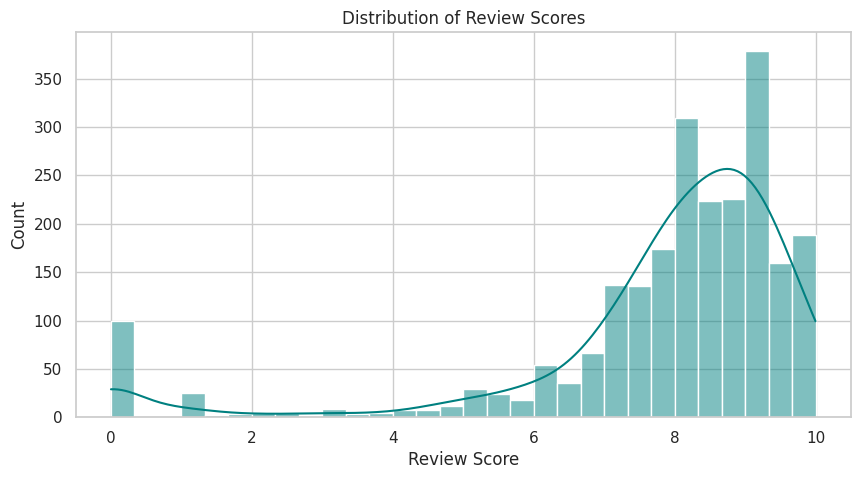

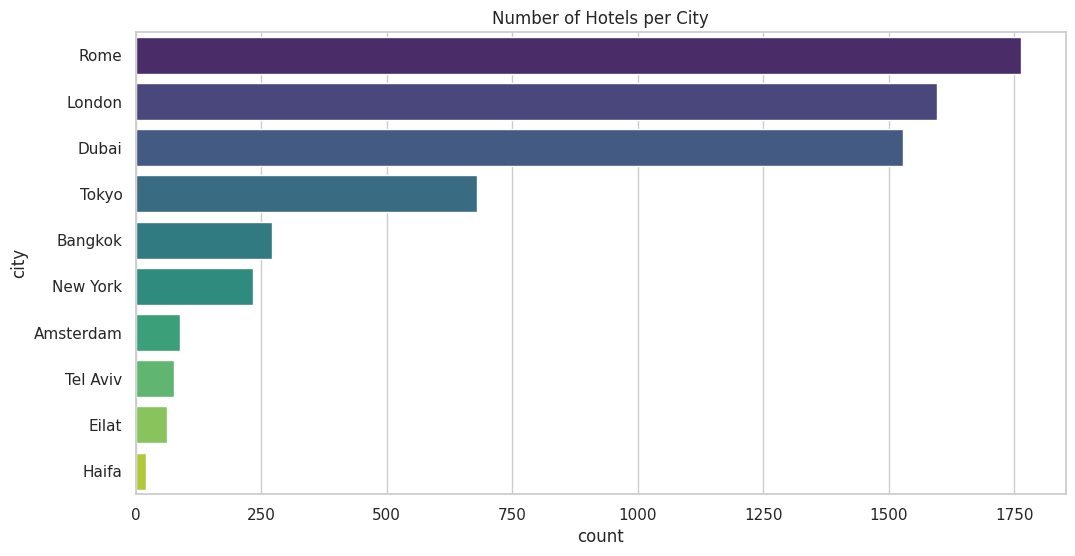

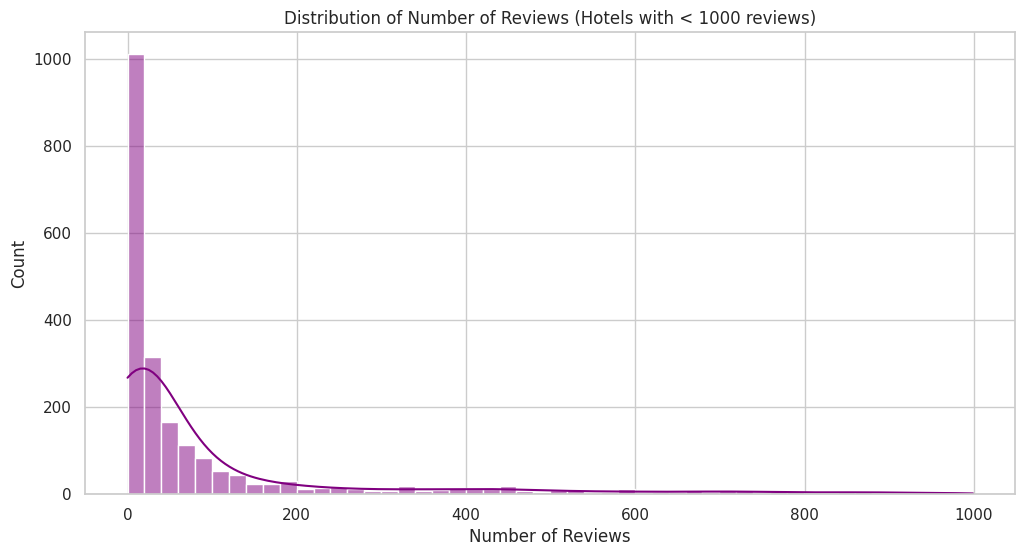

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get a sample for visualization (10% of data) 
cols = ['review_score', 'city', 'amenities_count', 'distance_from_center_km', 'number_of_reviews']
pdf = booking_parsed.select(cols).sample(fraction=0.1, seed=42).toPandas()

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Distribution of Review Scores 
plt.figure(figsize=(10, 5))
sns.histplot(pdf['review_score'], bins=30, kde=True, color='teal')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.show()

# Plot 2: Count of Hotels per City
plt.figure(figsize=(12, 6))
order = pdf['city'].value_counts().index
sns.countplot(data=pdf, y='city', order=order, palette='viridis')
plt.title('Number of Hotels per City')
plt.show()

# Plot 3: Distribution of Number of Reviews
plt.figure(figsize=(12, 6))
# We filter out extreme outliers (e.g. > 1000 reviews) for a clearer chart
subset_reviews = pdf[pdf['number_of_reviews'] < 1000]
sns.histplot(subset_reviews['number_of_reviews'], bins=50, kde=True, color='purple')
plt.title('Distribution of Number of Reviews (Hotels with < 1000 reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()



In [0]:
import plotly.express as px

# Prepare data
pdf = booking_parsed.select("lat", "lon", "city", "country", "title").sample(fraction=0.1, seed=42).toPandas()

# Create the Map
fig = px.scatter_geo(
    pdf, 
    lat='lat', 
    lon='lon', 
    template = 'simple_white',
    hover_name='title',              # Bold text on hover (Hotel Name)
    hover_data=['city', 'country'],  # Extra details on hover
    projection="natural earth",      # Standard world map
    title="World Map: Hotel Locations",
    color='city'                     # distinct color per city (optional, makes it easier to distinguish groups)
)


fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.show()